Código Aula 01: PY23VB

In [1]:
print("Eu vou dominar o pódio!")

Eu vou dominar o pódio!


In [2]:
print("Hello World")

Hello World


In [5]:
"String"

'String'

In [8]:
nome = "Alex"
profisao = "Programador"
idade = 33

In [9]:
2023-idade

1990

In [12]:
ano_nascimento = 2023-idade
ano_nascimento

1990

In [13]:
ano_nascimento > 1990

False

In [15]:
ano_nascimento <= 1990

True

In [16]:
ano_nascimento == 1990

True

# Programa

In [17]:
!pip install geopandas -q # -q instala em silêncio


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
!pip install mapclassify


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Pacotes

In [67]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import mapclassify


In [24]:
print(gpd.__version__)

0.12.2


Criando primeiros mapas

<AxesSubplot:>

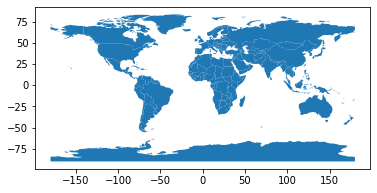

In [25]:
dados = gpd.datasets.get_path("naturalearth_lowres")
mundo = gpd.read_file(dados)
mundo.plot()

In [26]:
dados

'c:\\Users\\alexsandro.ignacio\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\geopandas\\datasets\\naturalearth_lowres\\naturalearth_lowres.shp'

In [27]:
mundo.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

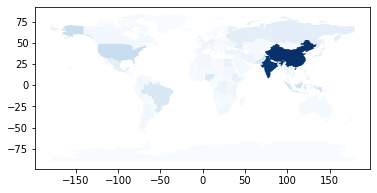

In [29]:
mundo.plot("pop_est", cmap="Blues")

<AxesSubplot:>

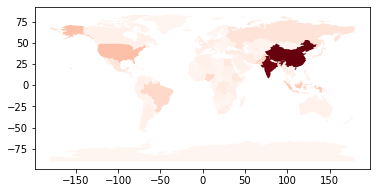

In [30]:
mundo.plot("pop_est", cmap="Reds")

In [32]:
mundo_filtrado = mundo[ (mundo['pop_est'] > 0) & (mundo['name'] != 'Antarctica') ]
mundo_filtrado.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
mundo_filtrado['gdp_per_cap'] =  mundo_filtrado['gdp_md_est'] / mundo_filtrado['pop_est']
mundo_filtrado

c:\Users\alexsandro.ignacio\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.007412
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.008908
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.004417
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.017397


<AxesSubplot:>

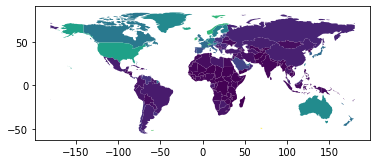

In [39]:
mundo_filtrado.plot(column = 'gdp_per_cap')

Criando uma legenda

<AxesSubplot:>

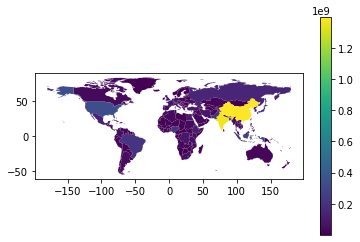

In [43]:
fig, ax = plt.subplots(1,1)
mundo_filtrado.plot(column='pop_est', ax=ax, legend=True)

<AxesSubplot:>

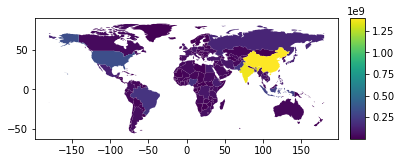

In [52]:
fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
mundo_filtrado.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

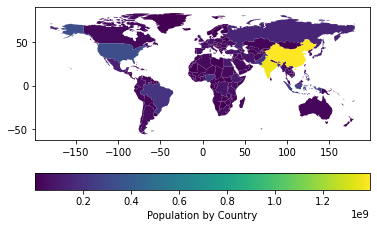

In [60]:
fig, ax = plt.subplots(1,1)
mundo_filtrado.plot(column='pop_est', 
                    ax=ax, 
                    legend=True, 
                    legend_kwds={'label':'Population by Country',
                                  'orientation':'horizontal'})

<AxesSubplot:>

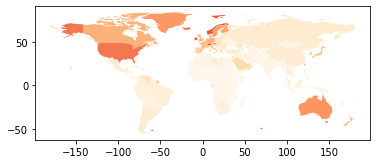

In [62]:
mundo_filtrado.plot(column='gdp_per_cap',
                    cmap='OrRd'
)

<AxesSubplot:>

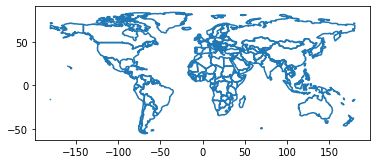

In [63]:
mundo_filtrado.boundary.plot()

<AxesSubplot:>

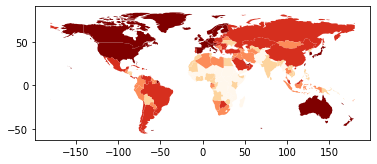

In [68]:
mundo_filtrado.plot(column='gdp_per_cap',
                    cmap='OrRd',
                    scheme='quantiles'
)

Exemplo numpy

In [53]:
link = 'https://query.data.world/s/qcbidyzgrwpxtqgvbimo7udpv7uykx'

In [55]:
casamentos = pd.read_excel(io=link)
casamentos

,ESTADO,ANO,QTDE
0,Acre,2009,5045
1,Acre,2010,3950
2,Acre,2011,3076
3,Acre,2012,3300
4,Acre,2013,2745
...,...,...,...
211,Tocantins,2012,7253
212,Tocantins,2013,7358
213,Tocantins,2014,7340
214,Tocantins,2015,7482


In [56]:
np.std(casamentos['QTDE'])

53673.43380502909

Estruturas de repetição.

In [51]:
ano = 2023

while ano < 2030:
    print(ano)
    ano += 2
print("Fim do loop")

2023
2025
2027
2029
Fim do loop
